In [28]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition, multiplicative_decomposition

from luwiji.time_series import illustration

# Error-Trend-Seasonal (ETS) Smoothing Method

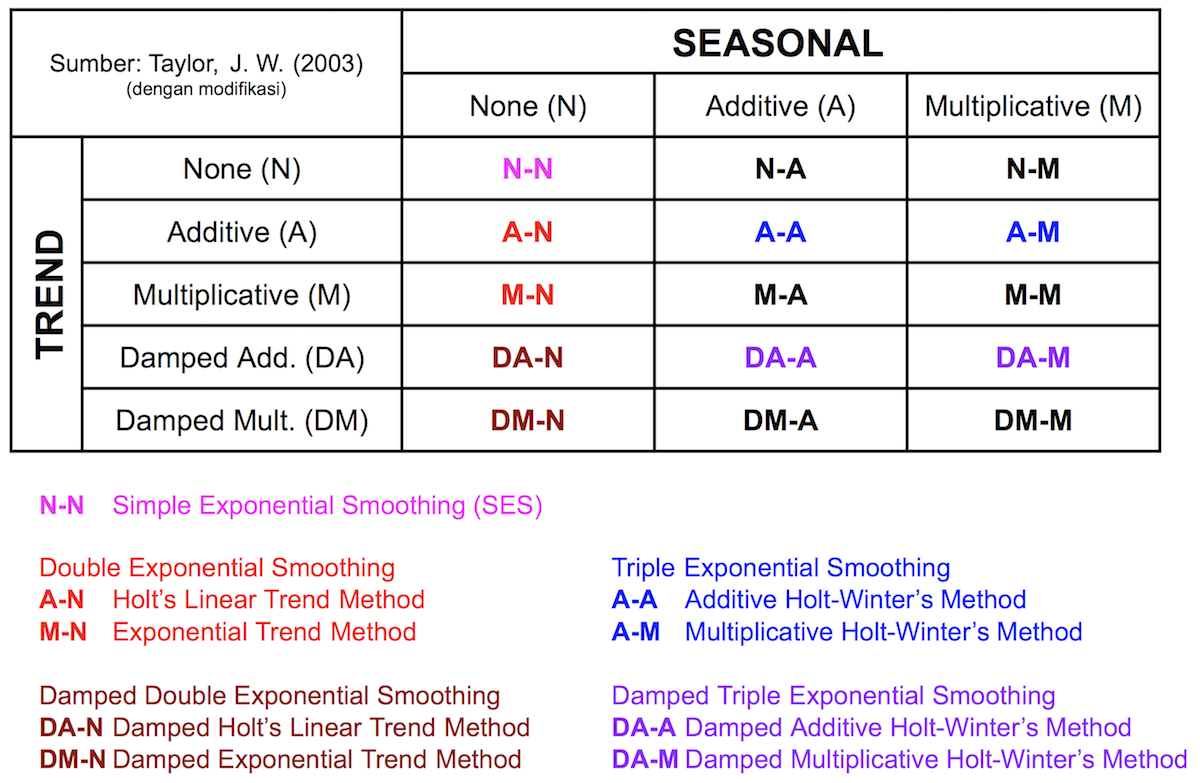

In [29]:
illustration.ets_model

# Exercise 1 : Cheese Production Data

<AxesSubplot:xlabel='date'>

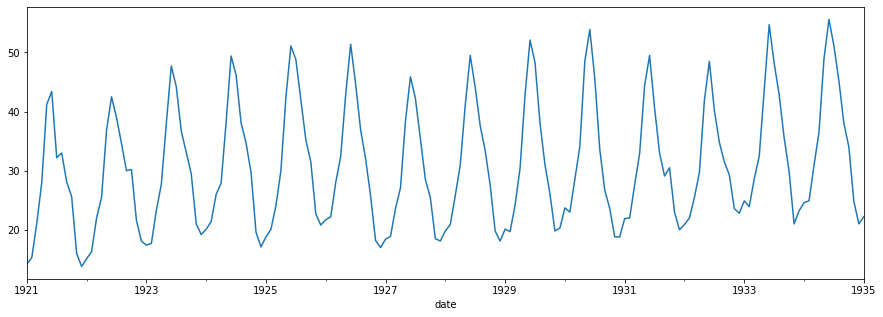

In [30]:
df = pd.read_csv("D:\Python\File Python\Machine Learning\Wira Time Series\sumber\Classic Time Series\data\cheese_fred.csv", index_col="date", parse_dates=['date'])
series = df['total_cheese_production']

X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

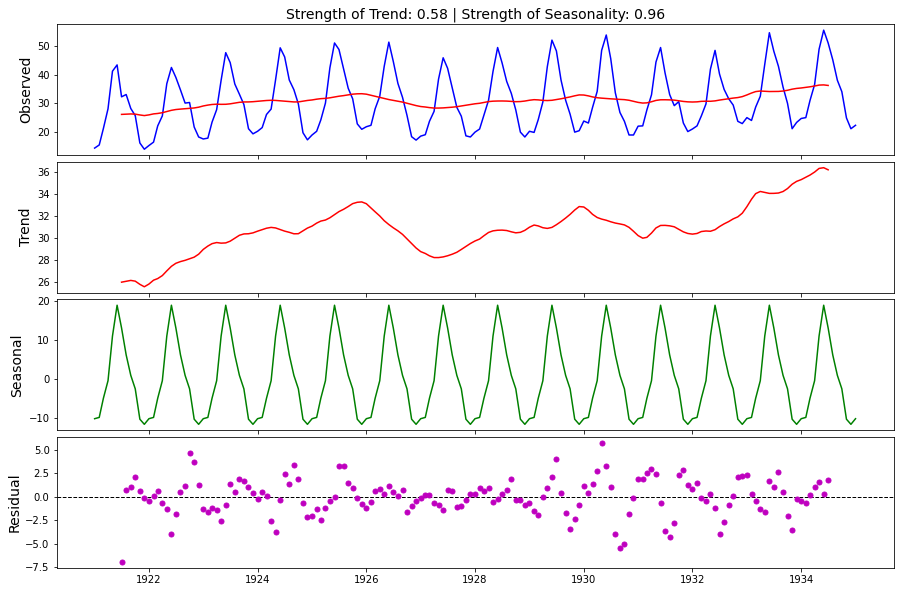

In [31]:
components = additive_decomposition(series, plot=True)

### Training

In [32]:
es = ExponentialSmoothing(X_train, seasonal="add", seasonal_periods=12)
model = es.fit(optimized=True)

d:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Forecast

In [33]:
len(X_train)

144

In [34]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

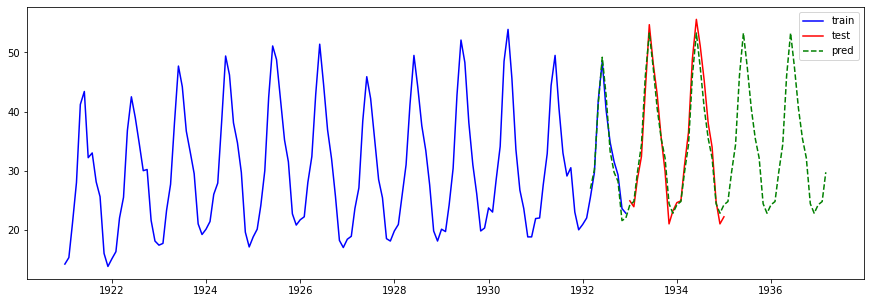

In [35]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="train")
plt.plot(X_test, "r-", label="test")
plt.plot(pred, "g--", label="pred")
plt.legend()

# Exercise 2 : Airline Passenger Data

<AxesSubplot:xlabel='Date'>

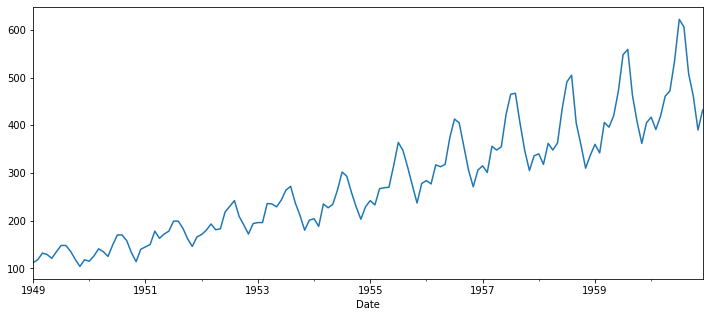

In [36]:
df = pd.read_csv("D:\Python\File Python\Machine Learning\Wira Time Series\sumber\Classic Time Series\data\\airline.csv", index_col="Date", parse_dates=['Date'])
series = df['passengers']

X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(12,5))

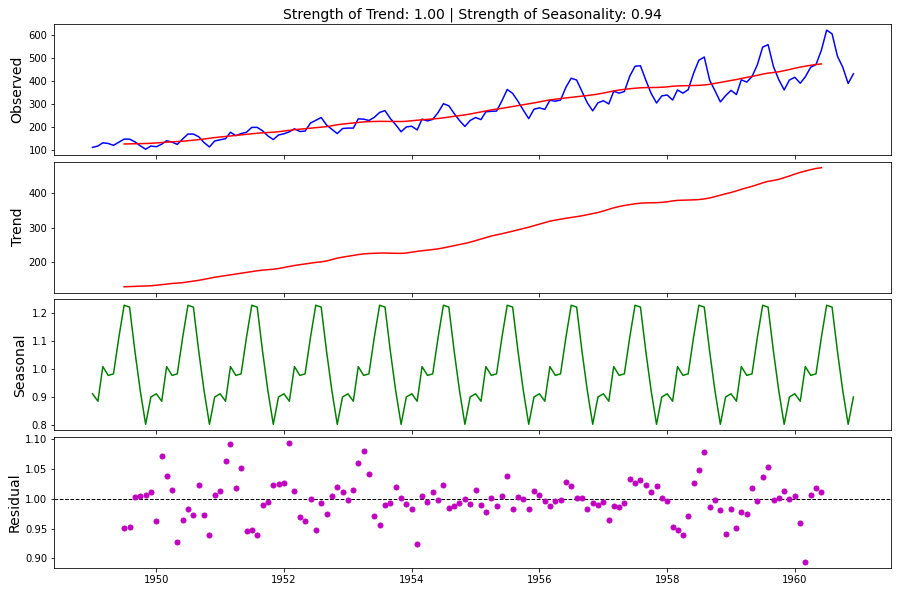

In [37]:
components = multiplicative_decomposition(series, plot=True)

trend nya additive<br>
seasonal nya multiplicative

### Training

In [38]:
es = ExponentialSmoothing(X_train, trend="add", seasonal="mul", seasonal_periods=12)
model = es.fit(optimized=True)

d:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


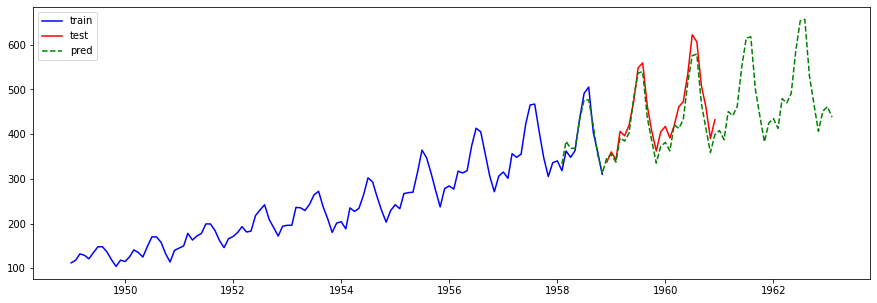

In [39]:
pred = model.predict(len(X_train)-10, len(X_train)+50)
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="train")
plt.plot(X_test, "r-", label="test")
plt.plot(pred, "g--", label="pred")
plt.legend()

# Exercise 3 : Christmas Search Interest

<AxesSubplot:xlabel='date'>

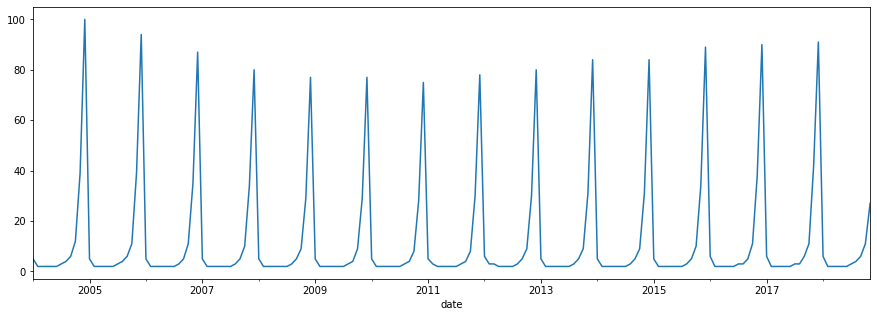

In [40]:
df = pd.read_csv("D:\Python\File Python\Machine Learning\Wira Time Series\sumber\Classic Time Series\data\\christmas.csv", index_col="date", parse_dates=['date'])
series = df['interest']

X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

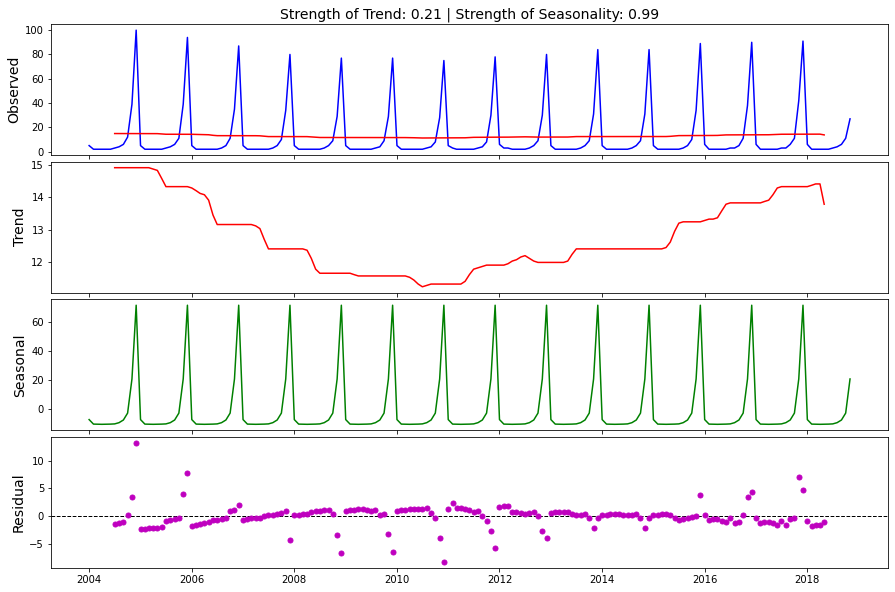

In [41]:
components = additive_decomposition(series, plot=True)

d:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


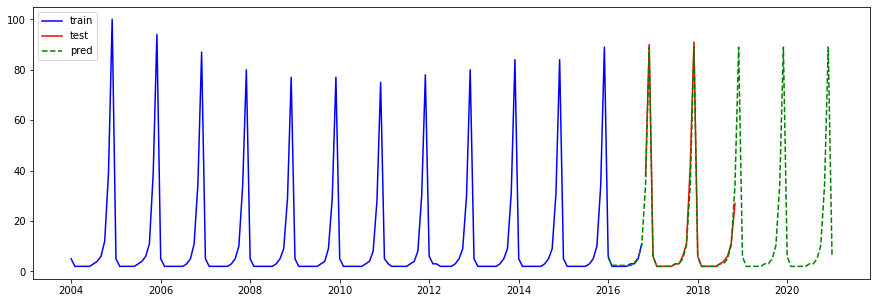

In [42]:
es = ExponentialSmoothing(X_train, seasonal="add", seasonal_periods=12)
model = es.fit(optimized=True)

pred = model.predict(len(X_train)-10, len(X_train)+50)
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="train")
plt.plot(X_test, "r-", label="test")
plt.plot(pred, "g--", label="pred")
plt.legend()

# Exercise 4 : Champagne Sales

<AxesSubplot:xlabel='date'>

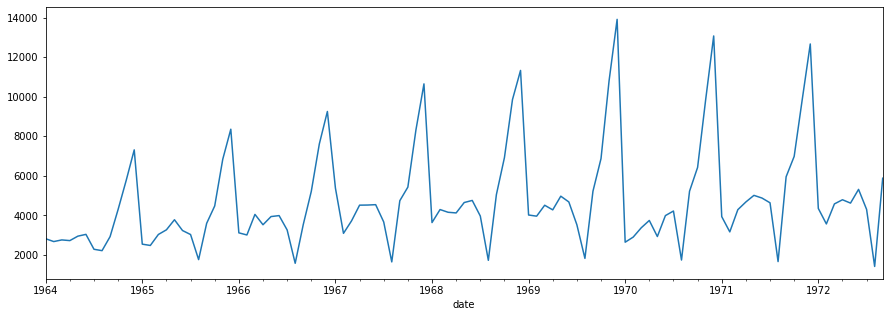

In [43]:
df = pd.read_csv("D:\Python\File Python\Machine Learning\Wira Time Series\sumber\Classic Time Series\data\\perrin_freres_champagne.csv", index_col="date", parse_dates=['date'])
series = df['sales']

X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

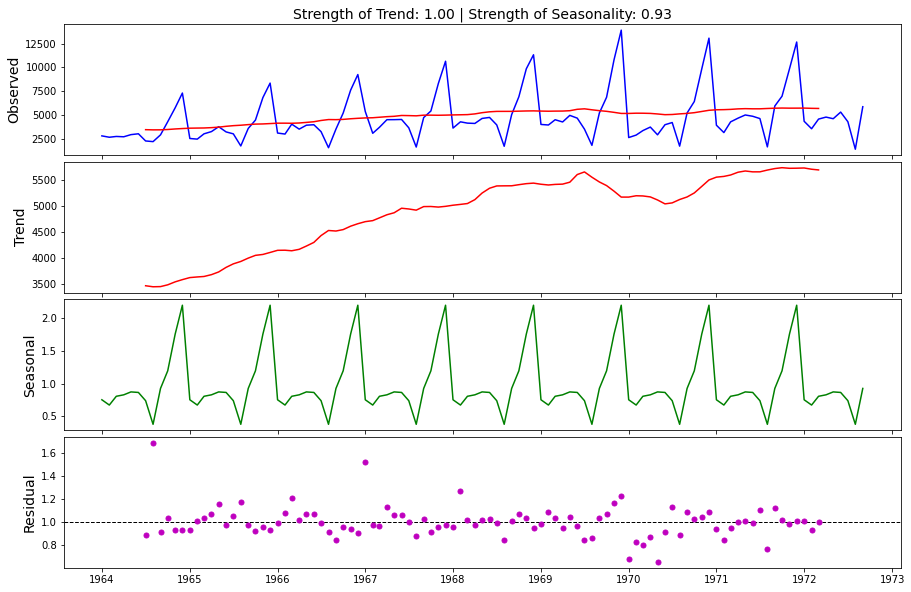

In [44]:
components = multiplicative_decomposition(series, plot=True)

d:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


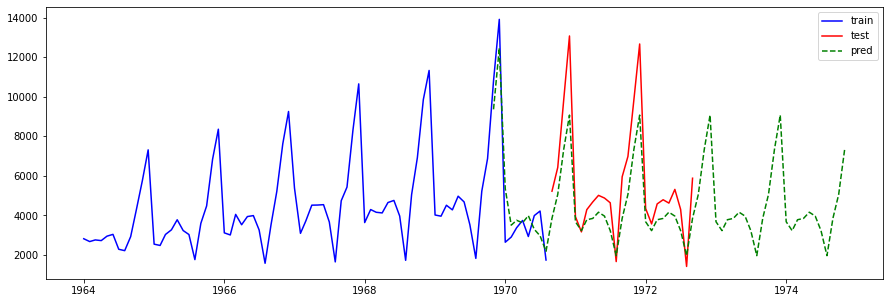

In [45]:
es = ExponentialSmoothing(X_train, seasonal="mul", seasonal_periods=12)
model = es.fit(optimized=True)

pred = model.predict(len(X_train)-10, len(X_train)+50)
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="train")
plt.plot(X_test, "r-", label="test")
plt.plot(pred, "g--", label="pred")
plt.legend()

# Auto ETS

In [46]:
from jcopml.time_series import auto_ets

<AxesSubplot:xlabel='date'>

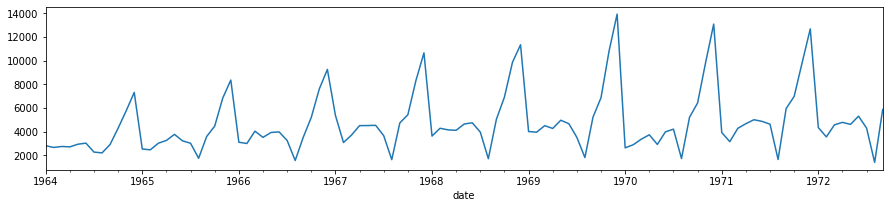

In [47]:
df = pd.read_csv("D:\Python\File Python\Machine Learning\Wira Time Series\sumber\Classic Time Series\data\\perrin_freres_champagne.csv", index_col="date", parse_dates=['date'])
df = df.resample("M").mean()
series = df['sales']

X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [48]:
from sktime.forecasting.ets import AutoETS

forecast = AutoETS(auto=True, n_jobs=-1, sp=12, random_state=42)
forecast.fit(X_train)

AutoETS(auto=True, n_jobs=-1, random_state=42, sp=12)

In [49]:
forecast.get_fitted_params()

{'aic': 1286.047212748716,
 'aicc': 1294.6821333836367,
 'bic': 1324.159638903498,
 'hqic': 1301.3275749680804}

In [50]:
forecast.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                  sales   No. Observations:                   80
Model:                       ETS(MNM)   Log Likelihood                -627.024
Date:                Sat, 17 Dec 2022   AIC                           1286.047
Time:                        18:46:38   BIC                           1324.160
Sample:                    01-31-1964   HQIC                          1301.328
                         - 08-31-1970   Scale                            0.024
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.1805      0.067      2.677      0.007       0.048       0.313
smoothing_seasonal      0.3051      0.218      1.399      0.162      -0.122       0.733
initial_level        3399.5167        nan        nan        nan         nan         nan
initial_seasonal.0      2.1623        nan        nan        nan         nan         nan
initial_seasonal.1      1.7770        nan        nan        nan         nan         nan
initial_seasonal.2      1.2466        nan        nan        nan         nan         nan
initial_seasonal.3      0.9440        nan        nan        nan         nan         nan
initial_seasonal.4      0.5286        nan        nan        nan         nan         nan
initial_seasonal.5      0.7538        nan        nan        nan         nan         nan
initial_seasonal.6      0.9083        nan        nan        nan         nan         nan
initial_seasonal.7      0.9470        nan        nan        nan         nan         nan
initial_seasonal.8      0.8686        nan        nan        nan         nan         nan
initial_seasonal.9      0.8680        nan        nan        nan         nan         nan
initial_seasonal.10     0.7614        nan        nan        nan         nan         nan
initial_seasonal.11     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                        8.49   Jarque-Bera (JB):                 8.10
Prob(Q):                              0.93   Prob(JB):                         0.02
Heteroskedasticity (H):               1.99   Skew:                             0.06
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

ETS(MNM) = ETS(Multiplicative, None, Multiplicative)<br>
<b>ETS(ETS) = ETS(Error, Trend, Seasonal)<br>
error = multiplicative<br>
trend = none<br>
seasonal = multiplicative<br>


"N"=none, "A"=additive, "M"=multiplicative and "Z"=automatically

<AxesSubplot:xlabel='Date'>

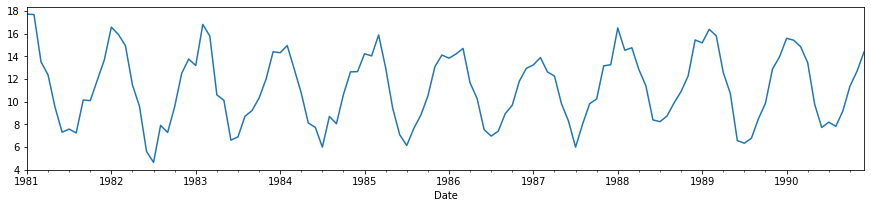

In [51]:
df = pd.read_csv("D:\Python\File Python\Machine Learning\Wira Time Series\sumber\Classic Time Series\data\\daily_min_temp.csv", index_col="Date", parse_dates=['Date'])
df = df.resample("M").mean()
series = df['Temp']

X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [62]:
from sktime.forecasting.ets import AutoETS

forecast = AutoETS(auto=True, n_jobs=-1, sp=12, random_state=42)
forecast.fit(series)

AutoETS(auto=True, n_jobs=-1, random_state=42, sp=12)

In [63]:
forecast.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                   Temp   No. Observations:                  120
Model:                      ETS(AAdA)   Log Likelihood                -153.687
Date:                Sat, 17 Dec 2022   AIC                            345.374
Time:                        21:32:21   BIC                            398.336
Sample:                    01-31-1981   HQIC                           366.882
                         - 12-31-1990   Scale                            0.758
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.0919      0.059      1.550      0.121      -0.024       0.208
smoothing_trend      9.189e-06        nan        nan        nan         nan         nan
smoothing_seasonal   9.081e-05        nan        nan        nan         nan         nan
damping_trend           0.8000        nan        nan        nan         nan         nan
initial_level          17.3652   2.59e+04      0.001      0.999   -5.07e+04    5.07e+04
initial_trend          -0.7236        nan        nan        nan         nan         nan
initial_seasonal.0     -1.0247   2.59e+04  -3.96e-05      1.000   -5.07e+04    5.07e+04
initial_seasonal.1     -2.3968   2.59e+04  -9.27e-05      1.000   -5.07e+04    5.07e+04
initial_seasonal.2     -4.5670   2.59e+04     -0.000      1.000   -5.07e+04    5.07e+04
initial_seasonal.3     -5.9015   2.59e+04     -0.000      1.000   -5.07e+04    5.07e+04
initial_seasonal.4     -6.9901   2.59e+04     -0.000      1.000   -5.07e+04    5.07e+04
initial_seasonal.5     -8.1950   2.59e+04     -0.000      1.000   -5.07e+04    5.07e+04
initial_seasonal.6     -7.6187   2.59e+04     -0.000      1.000   -5.07e+04    5.07e+04
initial_seasonal.7     -5.0442   2.59e+04     -0.000      1.000   -5.07e+04    5.07e+04
initial_seasonal.8     -2.8409   2.59e+04     -0.000      1.000   -5.07e+04    5.07e+04
initial_seasonal.9     -0.3887   2.59e+04   -1.5e-05      1.000   -5.07e+04    5.07e+04
initial_seasonal.10     0.3911   2.59e+04   1.51e-05      1.000   -5.07e+04    5.07e+04
initial_seasonal.11          0   2.59e+04          0      1.000   -5.07e+04    5.07e+04
===================================================================================
Ljung-Box (Q):                       26.81   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.31   Prob(JB):                         0.75
Heteroskedasticity (H):               0.61   Skew:                            -0.03
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

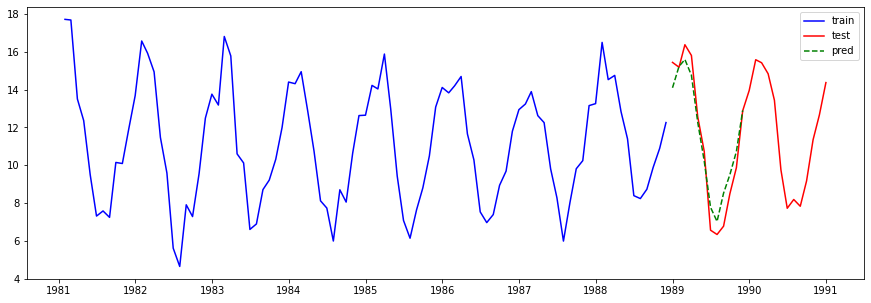

In [61]:
pred = forecast.predict(fh=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="train")
plt.plot(X_test, "r-", label="test")
plt.plot(pred, "g--", label="pred")
plt.legend()